### Maternal Health Risk Prediction

In [1]:
#Importing Relevant Libraries
import pandas as pd #to load in the dataset
import numpy as np #to load in the dataset
from sklearn import linear_model #for the model training
from sklearn.model_selection import train_test_split #for train-test splitting
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Loading the training dataset
data_train = pd.read_csv('train.csv')
data_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,26,120,59,7.10,98.0,65,mid risk
1,14,131,79,6.84,98.0,70,mid risk
2,28,121,89,6.04,98.0,77,mid risk
3,24,91,100,7.75,98.0,79,high risk
4,23,120,66,6.98,98.0,84,mid risk
...,...,...,...,...,...,...,...
3995,37,98,51,7.23,98.0,78,low risk
3996,25,101,79,7.21,98.0,70,low risk
3997,42,120,85,6.11,98.0,78,mid risk
3998,34,119,79,6.83,98.0,76,high risk


In [3]:
data_test = pd.read_csv("test.csv")
data_test

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
0,30,87,81,7.13,98.0,78
1,33,119,89,7.01,98.0,65
2,35,128,84,6.69,98.0,56
3,36,119,62,6.25,100.7,64
4,23,150,69,7.21,98.0,86
...,...,...,...,...,...,...
995,29,121,68,7.53,98.0,86
996,25,119,79,6.28,98.0,70
997,15,120,79,6.50,98.0,78
998,35,93,68,10.96,98.0,70


In [4]:
#Checking for null values in the data set
data_train.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [5]:
data_train['RiskLevel'].nunique()

3

In [6]:
#Checking for data type
data_train.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

Text(0.5, 1.0, 'Distribution of HeartRate')

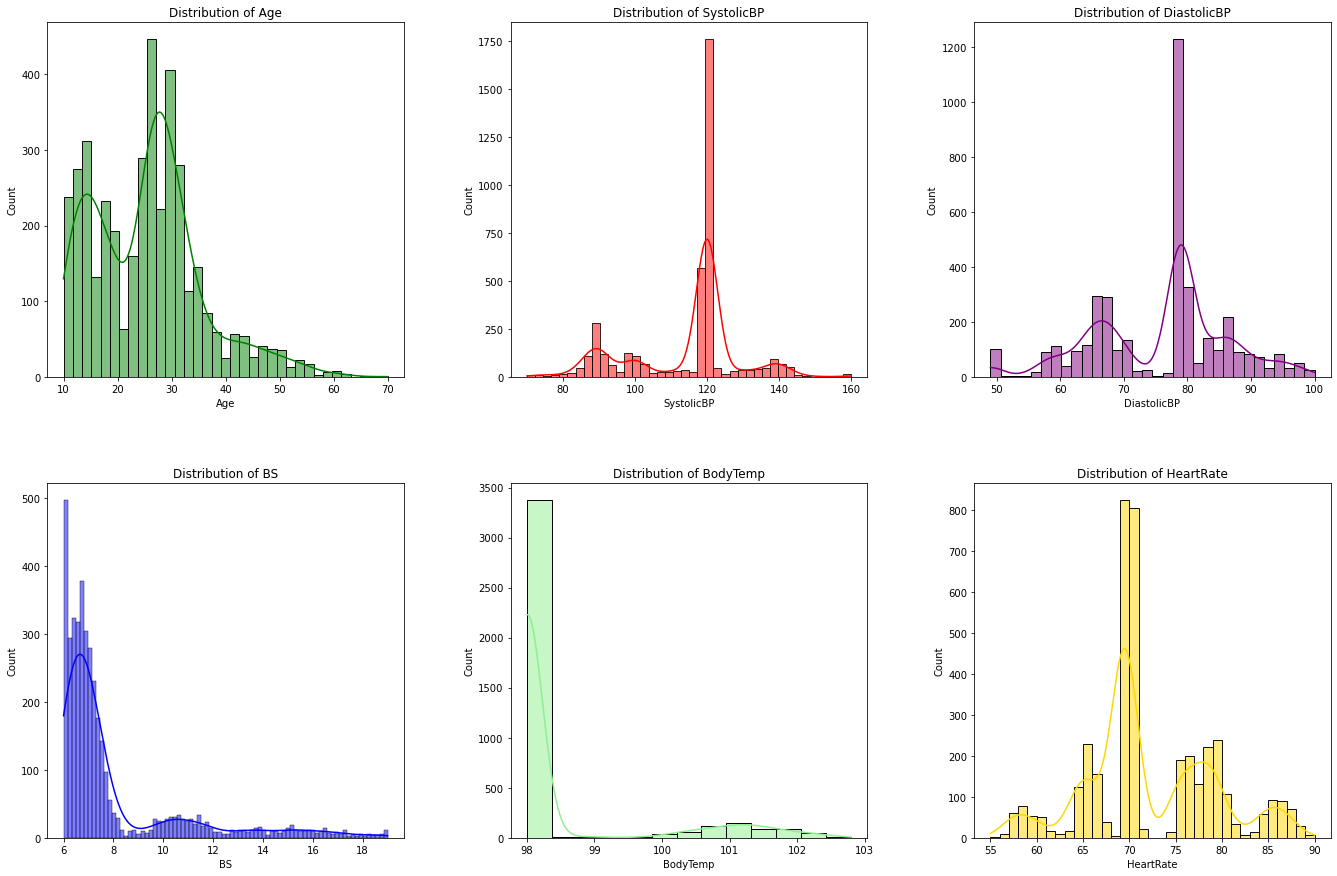

In [7]:
#Check for normality of the data set 
#Distribution of continuous variables in one plot
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(data_train['Age'], color='g', kde=True)
plt.title('Distribution of Age')

plt.subplot(2, 3, 2)
sns.histplot(data_train['SystolicBP'], color='r', kde=True)
plt.title('Distribution of SystolicBP')

plt.subplot(2, 3, 3)
sns.histplot(data_train['DiastolicBP'], color='purple', kde=True)
plt.title('Distribution of DiastolicBP')

plt.subplot(2, 3, 4)
sns.histplot(data_train['BS'], color='blue', kde=True)
plt.title('Distribution of BS')

plt.subplot(2, 3, 5)
sns.histplot(data_train['BodyTemp'], color='lightgreen', kde=True)
plt.title('Distribution of BodyTemp')

plt.subplot(2, 3, 6)
sns.histplot(data_train['HeartRate'], color='gold', kde=True)
plt.title('Distribution of HeartRate')

##### By visual inspection the variables are not normally distributed 

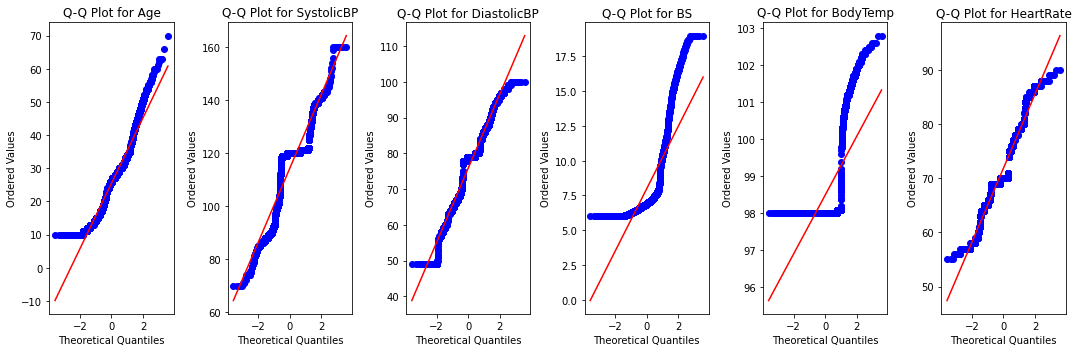

In [8]:
#Using Q-Q plot to determine normal distribution of the variables
fig, axs = plt.subplots(1, 6, figsize=(15, 5))
variables = ['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate']
for i, col in enumerate(variables):
    stats.probplot(data_train[col], dist= "norm", plot=axs[i])
    axs[i].set_title(f"Q-Q Plot for {col}")
    axs[i].set_xlabel('Theoretical Quantiles')
    axs[i].set_ylabel('Ordered Values')
plt.tight_layout()
plt.show()
#plt.figure(figsize=(6, 6))
#stats.probplot(data_train, dist= "norm", plot=plt)

#### The Q-Q plots confirms that the continuous variables are not normally distributed 

### #Using Shapiro Wilt test to confirm normality of the variables 
#### #Null Hypothesis: Age is normally distributed
#### #Alternative Hypothesis: Age is not normally distributed

In [9]:
#Import shapiro from scipy_stats
from scipy.stats import shapiro

In [10]:
statistic, p_value = shapiro(data_train['Age'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [11]:
statistic, p_value = shapiro(data_train['SystolicBP'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [12]:
statistic, p_value = shapiro(data_train['DiastolicBP'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [13]:
statistic, p_value = shapiro(data_train['BS'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [14]:
statistic, p_value = shapiro(data_train['BodyTemp'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


In [15]:
statistic, p_value = shapiro(data_train['HeartRate'])
statistic, p_value
# Interpret the results
alpha = 0.05 # Significance level
if p_value > alpha:
    print("The data looks Gaussian (fail to reject H0)")
else:
    print("The data does not look Gaussian (reject H0)")

The data does not look Gaussian (reject H0)


#### The histogram, Q-Q and the Shapiro Wilt test all have show that the continuous variables train the data set are not normally distributed. Thus we need to log transform the variables

In [16]:
data_train['log_Age'] = data_train['Age'].apply(np.log)
data_train['log_SystolicBP'] = data_train['SystolicBP'].apply(np.log)
data_train['log_DiastolicBP'] = data_train['DiastolicBP'].apply(np.log)
data_train['log_BS'] = data_train['BS'].apply(np.log)
data_train['log_BodyTemp'] = data_train['BodyTemp'].apply(np.log)
data_train['log_HeartRate'] = data_train['HeartRate'].apply(np.log)

Text(0.5, 1.0, 'Distribution of log_HeartRate')

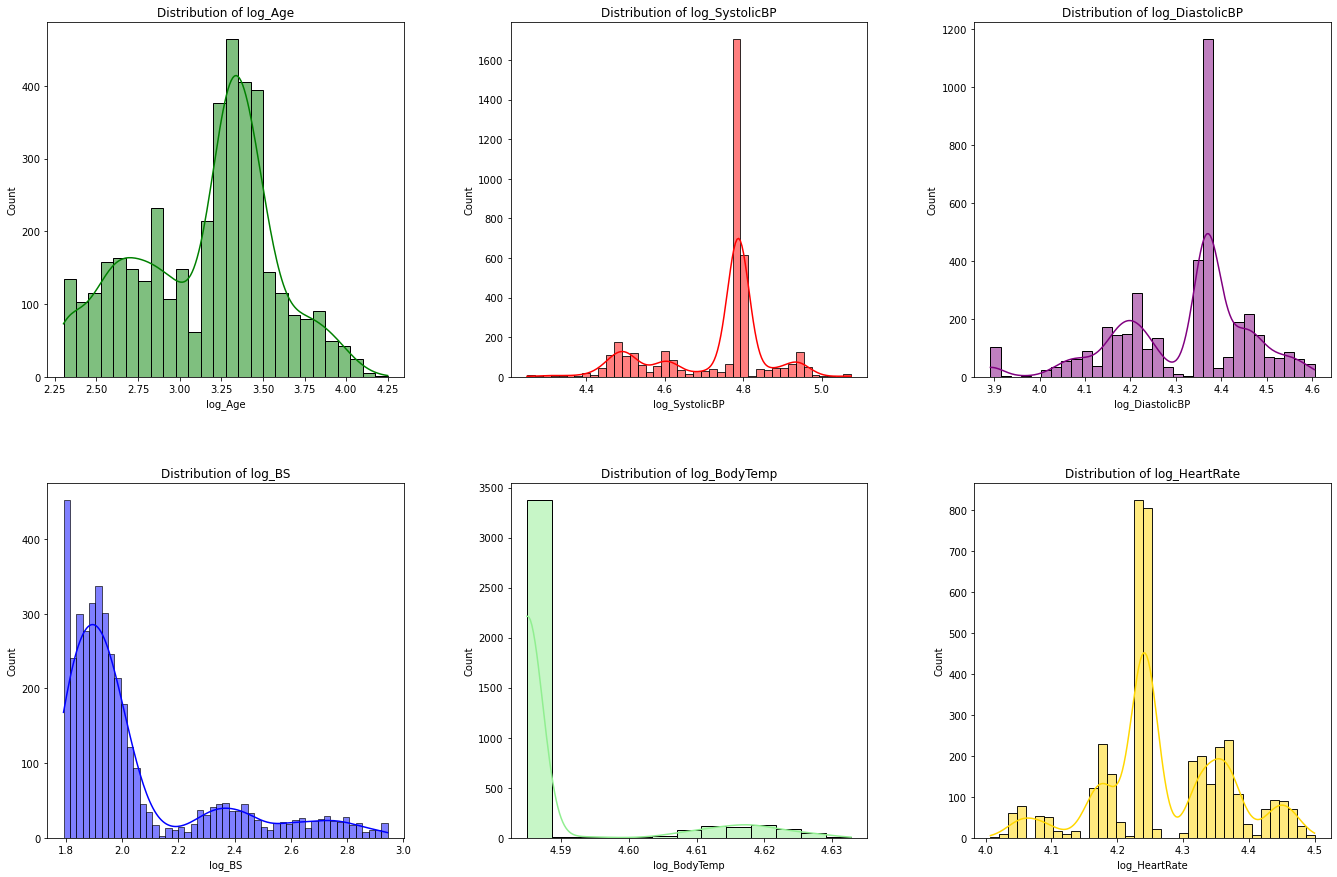

In [17]:
#Check for normality of the data set 
#Distribution of continuous variables in one plot
plt.figure(figsize=(23,15))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.subplot(2, 3, 1)
sns.histplot(data_train['log_Age'], color='g', kde=True)
plt.title('Distribution of log_Age')

plt.subplot(2, 3, 2)
sns.histplot(data_train['log_SystolicBP'], color='r', kde=True)
plt.title('Distribution of log_SystolicBP')

plt.subplot(2, 3, 3)
sns.histplot(data_train['log_DiastolicBP'], color='purple', kde=True)
plt.title('Distribution of log_DiastolicBP')

plt.subplot(2, 3, 4)
sns.histplot(data_train['log_BS'], color='blue', kde=True)
plt.title('Distribution of log_BS')

plt.subplot(2, 3, 5)
sns.histplot(data_train['log_BodyTemp'], color='lightgreen', kde=True)
plt.title('Distribution of log_BodyTemp')

plt.subplot(2, 3, 6)
sns.histplot(data_train['log_HeartRate'], color='gold', kde=True)
plt.title('Distribution of log_HeartRate')

In [18]:
statistic, p_value = shapiro(data_train['log_Age'])
statistic, p_value
# Interpret the results
#alpha = 0.05 # Significance level
#if p_value > alpha:
#    print("The data looks Gaussian (fail to reject H0)")
#else:
 #   print("The data does not look Gaussian (reject H0)")

(0.9663368463516235, 1.315540302751005e-29)

### Training a Logistic Regression Model

In [19]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
# Drop the target column from the training set to create X_train
X_train = data_train.drop('RiskLevel', axis=1)
# Set y_train as the target variable
y_train = data_train['RiskLevel']

In [22]:
# Create X_test data
X_test = data_test
y_test = data_test
# Ensure X_test has the same columns as X_train
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [23]:
#Instantiating the logistic regrsssion model
regression = linear_model.LogisticRegression(max_iter = 1000)

In [24]:
#Fitting the model
regression.fit(X_train, y_train)

C:\Users\Ayembilla\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [25]:
#Making predictions on the test data
y_pred = regression.predict(X_test)

In [26]:
#Evaluating the model's performance using accuracy as the metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [27]:
#Evaluating the model's performance using precision as the metric
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print("Precision: ", precision)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

### Training k-Nearest Neighbors (k-NN) Model

In [28]:
#Importing relevant libraries
from sklearn.neighbors import KNeighborsClassifier

In [29]:
#Instantiating a k-NN Classifier with two clusters
knn = KNeighborsClassifier(n_neighbors = 2)

In [31]:
#Fitting/Training the classifer 
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=2)

In [32]:
#Testing the knn model by predicting with unseen (test) data
y_pred = knn.predict(X_test)

In [33]:
#Evaluating the model's performance using accuracy as the metric
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets